<a href="https://colab.research.google.com/github/devesssi/EDUNNET/blob/main/model_buildingDAY03(part_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 1: Load the dataset
df = pd.read_csv("water_usage_prediction.csv")
df.head()

,State,Year,Population (millions),Annual Rainfall (mm),Agricultural Land (sq km),Industrial Water Usage (billion liters),Domestic Water Usage (billion liters),Total Water Consumption (billion liters)
0,Himachal Pradesh,2014,62.06,2335.9,27858.7,217.78,173.96,391.74
1,Maharashtra,2023,161.10,2896.7,4921.7,283.42,169.84,453.26
2,Tamil Nadu,2003,249.33,653.0,29305.3,257.51,257.38,514.89
3,Haryana,2016,37.34,972.3,71026.8,204.25,218.42,422.67
4,Chhattisgarh,2006,152.04,825.5,174406.8,281.18,27.66,308.84


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   State                                     5000 non-null   object 
 1   Year                                      5000 non-null   int64  
 2   Population (millions)                     5000 non-null   float64
 3   Annual Rainfall (mm)                      5000 non-null   float64
 4   Agricultural Land (sq km)                 5000 non-null   float64
 5   Industrial Water Usage (billion liters)   5000 non-null   float64
 6   Domestic Water Usage (billion liters)     5000 non-null   float64
 7   Total Water Consumption (billion liters)  5000 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 312.6+ KB


In [ ]:
df.describe()

,Year,Population (millions),Annual Rainfall (mm),Agricultural Land (sq km),Industrial Water Usage (billion liters),Domestic Water Usage (billion liters),Total Water Consumption (billion liters)
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2012.497400,125.70539,2248.314020,98955.694280,247.421504,149.555980,396.977484
std,7.508533,70.94088,1020.926499,57509.336193,145.108072,86.244363,168.687823
min,2000.000000,2.04000,501.600000,1062.500000,1.030000,0.530000,6.940000
25%,2006.000000,64.14750,1353.675000,49401.775000,121.175000,74.075000,267.460000
50%,2013.000000,125.49500,2243.900000,97318.700000,242.260000,147.990000,401.255000
75%,2019.000000,186.79250,3129.800000,149180.925000,374.270000,224.432500,524.955000
max,2025.000000,249.89000,3999.600000,199992.000000,499.930000,299.980000,794.560000


In [ ]:
df.isnull().sum()

,0
State,0
Year,0
Population (millions),0
Annual Rainfall (mm),0
Agricultural Land (sq km),0
Industrial Water Usage (billion liters),0
Domestic Water Usage (billion liters),0
Total Water Consumption (billion liters),0


[]

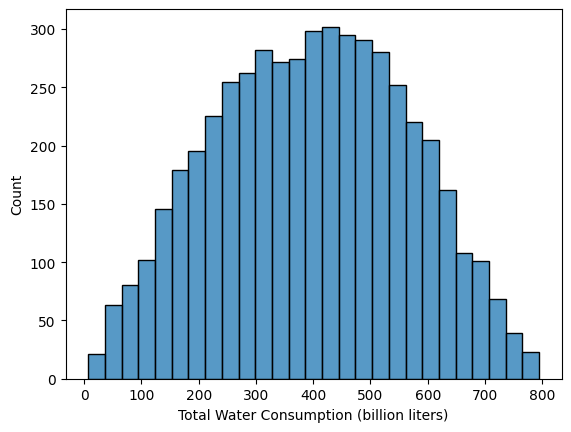

In [ ]:
# this graph is like noraml distribution graph
# A normal distribution, also known as a Gaussian distribution or bell curve, is a probability distribution that is symmetrical and bell-shaped, with the majority of data points clustering around the mean (average) and tapering off towards the extremes
sns.histplot(df["Total Water Consumption (billion liters)"])
plt.plot()

rules for ml :
doesnt understand strict data
only understand numeric data not string data

what about state in the data--> here comes the** encoding **-->steps:

1.it will uniquely identifies the string from the table and assign it no's(class) in the alphabetical order and use the no assigned to it.

for eg: grade A,A,F,G,W,W,Y,D,G
A-->1 .....

In [ ]:
# Step 2: Preprocess Data
# Encode categorical column 'State'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])

In [ ]:
label_encoder.classes_

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [ ]:
df.head()

# in this data the total water consumption is continous so we'll use linear regression model

,State,Year,Population (millions),Annual Rainfall (mm),Agricultural Land (sq km),Industrial Water Usage (billion liters),Domestic Water Usage (billion liters),Total Water Consumption (billion liters)
0,8,2014,62.06,2335.9,27858.7,217.78,173.96,391.74
1,13,2023,161.10,2896.7,4921.7,283.42,169.84,453.26
2,22,2003,249.33,653.0,29305.3,257.51,257.38,514.89
3,7,2016,37.34,972.3,71026.8,204.25,218.42,422.67
4,4,2006,152.04,825.5,174406.8,281.18,27.66,308.84


In [ ]:

# Drop Year column as it is not needed
df.drop(columns=["Year"],inplace=True)

# to drop row we will use index


In [ ]:
df.head()

,State,Population (millions),Annual Rainfall (mm),Agricultural Land (sq km),Industrial Water Usage (billion liters),Domestic Water Usage (billion liters),Total Water Consumption (billion liters)
0,8,62.06,2335.9,27858.7,217.78,173.96,391.74
1,13,161.10,2896.7,4921.7,283.42,169.84,453.26
2,22,249.33,653.0,29305.3,257.51,257.38,514.89
3,7,37.34,972.3,71026.8,204.25,218.42,422.67
4,4,152.04,825.5,174406.8,281.18,27.66,308.84


In [ ]:
# Step 3: seperate x and y variable
# [: --> rows, : --> cols] we can target it like this eg: df.iloc[ : , 0:6]--> all rows but 0-> 5 colmn


x = df.drop(columns=["Total Water Consumption (billion liters)"])  # Features
y = df["Total Water Consumption (billion liters)"]  # Target variable

In [ ]:
# Step 4: Split data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: standardize the data to improve model performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)




In [ ]:
# Step 6: Train the Linear Regression model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)



LinearRegression()

In [ ]:
# Step 7: Make predictions
ypred = model.predict(xtest)



In [ ]:
# Step 8: Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

# Print results
print("Mean Absolute Error:", mae)
#we take the absolute of the err i.e to take the mod of it and then take mean of it
# we can also take sqr of error  to handle -ve and +ve err and then take mean of it
# there is also a root of the msr
print("Mean Squared Error:", mse)
print("R-squared Score:", r2) # r-sqr accuracy means accuracy

Mean Absolute Error: 7.183587058534612e-14
Mean Squared Error: 8.661036407053565e-27
R-squared Score: 1.0


In [ ]:
df.head()


,State,Population (millions),Annual Rainfall (mm),Agricultural Land (sq km),Industrial Water Usage (billion liters),Domestic Water Usage (billion liters),Total Water Consumption (billion liters)
0,8,62.06,2335.9,27858.7,217.78,173.96,391.74
1,13,161.10,2896.7,4921.7,283.42,169.84,453.26
2,22,249.33,653.0,29305.3,257.51,257.38,514.89
3,7,37.34,972.3,71026.8,204.25,218.42,422.67
4,4,152.04,825.5,174406.8,281.18,27.66,308.84


In [ ]:
xtest

array([[-1.19647526, -1.10198184,  0.86641639, -0.53661627,  0.89755749,
         1.0069661 ],
       [-1.69387969,  0.74234899, -1.26358926,  0.27369312, -0.94640405,
         1.23622364],
       [ 1.53924908, -0.37313035,  0.34491404, -0.1043766 , -0.68602375,
         0.40216841],
       ...,
       [-1.56952858, -0.31529173,  0.4401415 ,  0.81155122,  1.33464672,
        -1.56851546],
       [ 1.16619577, -1.73424707, -0.85305526, -0.36536823,  0.83463051,
        -1.32971521],
       [ 1.29054687, -1.3244272 , -1.56178614, -0.3834185 ,  0.4649779 ,
        -0.12919704]])

In [ ]:
ytest

,Total Water Consumption (billion liters)
1501,612.86
2586,366.78
2653,332.64
1055,439.13
705,469.51
...,...
4711,158.85
2313,170.27
3214,454.55
2732,403.00


In [ ]:
model.predict([[ 1.53924908, -0.37313035,  0.34491404, -0.1043766 , -0.68602375,
         0.40216841]])

array([332.63999945])

In [ ]:
df.head(

)

,State,Population (millions),Annual Rainfall (mm),Agricultural Land (sq km),Industrial Water Usage (billion liters),Domestic Water Usage (billion liters),Total Water Consumption (billion liters)
0,8,62.06,2335.9,27858.7,217.78,173.96,391.74
1,13,161.10,2896.7,4921.7,283.42,169.84,453.26
2,22,249.33,653.0,29305.3,257.51,257.38,514.89
3,7,37.34,972.3,71026.8,204.25,218.42,422.67
4,4,152.04,825.5,174406.8,281.18,27.66,308.84


# building a ml model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/Energy_consumption (1).csv")
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [ ]:
df.drop(columns=["Timestamp"],inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['HVACUsage'] = label_encoder.fit_transform(df['HVACUsage'])
df['Holiday'] = label_encoder.fit_transform(df['Holiday'])
df['LightingUsage'] = label_encoder.fit_transform(df['LightingUsage'])
df['DayOfWeek'] = label_encoder.fit_transform(df['DayOfWeek'])

In [ ]:
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,25.139433,43.431581,1565.693999,5,1,0,2.774699,1,0,75.364373
1,27.731651,54.225919,1411.064918,1,1,1,21.831384,2,0,83.401855
2,28.704277,58.907658,1755.715009,2,0,0,6.764672,3,0,78.270888
3,20.080469,50.371637,1452.316318,1,0,1,8.623447,6,0,56.519850
4,23.097359,51.401421,1094.130359,9,1,0,3.071969,0,0,70.811732


In [ ]:
y = df["EnergyConsumption"]  # Target variable
x = df.drop(columns=["EnergyConsumption"])  # Features

In [ ]:
# Step 4: Split data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)



In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)


LinearRegression()

In [ ]:
y_pred = model.predict(xtest)
ypred

array([612.86, 366.78, 332.64, 439.13, 469.51, 147.67, 369.99, 319.16,
       468.87, 479.42, 299.77, 647.35, 375.26, 546.26, 491.69, 407.38,
       587.45, 688.42, 617.98, 723.29, 647.14, 412.94, 226.91, 352.5 ,
       131.35, 271.81, 383.16, 569.12, 569.49, 552.89, 332.68, 523.11,
       234.84, 177.1 , 327.26, 466.58, 434.4 , 579.97, 473.95, 188.85,
       236.27, 678.54, 158.92, 355.74, 121.34, 276.69, 324.79, 549.47,
       472.23, 635.68, 270.8 , 491.04, 222.05, 215.85, 267.94, 650.47,
       534.03, 498.84, 530.73, 418.21, 559.24, 322.99, 252.68, 337.3 ,
       415.31, 131.86, 678.11, 344.68, 221.27, 191.87, 660.2 , 157.42,
       482.75, 462.36, 543.15, 214.96, 384.15,  68.74, 240.11, 404.59,
       769.89, 467.21, 243.84, 221.82, 302.78, 155.58, 455.95, 240.39,
       225.99, 204.95, 265.55, 474.85, 104.08, 548.29, 158.22, 261.93,
       539.95, 647.41, 322.86, 355.73, 234.68, 538.66, 597.89, 346.05,
       290.34, 127.66, 588.56, 353.97, 376.53, 453.96, 530.97, 680.47,
      

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Absolute Error: 4.108560067809037
Mean Squared Error: 26.34226315836093
R-squared Score: 0.5978272791753017


In [ ]:
xtest

array([[ 0.421798  ,  0.40293238, -0.70463059, ..., -1.1088646 ,
         0.53393979,  1.09997489],
       [ 0.78994503, -1.35465891, -0.16393411, ..., -1.26412462,
         1.53312535, -0.90911166],
       [ 0.07776934, -0.88194205,  1.2841232 , ..., -1.16511486,
        -0.96483856,  1.09997489],
       ...,
       [ 0.70530769, -1.54597232,  1.20212462, ..., -1.7502508 ,
        -0.46524578, -0.90911166],
       [ 1.10230118,  0.08595596, -0.44109078, ...,  0.49976642,
        -0.46524578,  1.09997489],
       [-1.43797446,  0.83786508,  0.9414213 , ...,  0.72891682,
         0.53393979,  1.09997489]])

In [ ]:
ytest

,EnergyConsumption
521,86.920611
737,88.351606
740,79.431363
660,90.009188
411,83.891100
...,...
408,86.919371
332,66.833390
208,80.043926
613,76.399561


In [ ]:
model.predict([xtest[0]])

array([83.47782854])

# LOGISTIC REGRESSION

THIS IS A CLASSIFICATION MODEL--> SIGMOID function(n)  = 1/1+e^-x(activation function) it  is between (0-1)

threshold for roundingup the logits i.e the computer op -->

 n > 0.5 considers ->1

n < 0.5 considers ->0


NOTE:IT IS BEST FOR BINARY CLASSIFICATION IF WE USE SIGMOID AS A ACTIVATION FUNCTION

FOR MULTCLASS: SOFTMAX

Q: WHY LOGISTIC REGRESSION ?, COZ THE SIGMOID GIVES THE CONTINOUS VALUES FROM 0-1

NOTE: Min-Max scaling and Standard scaling (also known as standardization) are both data scaling techniques, but they achieve different transformations. Min-Max scaling rescales the data to a specific range, typically 0 to 1, while Standard scaling transforms the data to have a mean of 0 and a standard deviation of 1.


note we dont get mse, mae--> instead we will get confusion matrix , accuracy, classification report.

The **only difference** between **linear** and **logistic regression** lies in how they model the **output (dependent variable)**. Here's a clear breakdown:

---

### ✅ 1. **Nature of Output**

| Model                   | Output Type                            | Explanation                                             |
| ----------------------- | -------------------------------------- | ------------------------------------------------------- |
| **Linear Regression**   | Continuous value (e.g., price, weight) | Predicts a **real number**.                             |
| **Logistic Regression** | Categorical value (e.g., yes/no, 0/1)  | Predicts the **probability** of a class (e.g., 0 or 1). |

---

### ✅ 2. **Equation**

| Model        | Equation Form                                                        |
| ------------ | -------------------------------------------------------------------- |
| **Linear**   | $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n$         |
| **Logistic** | $p = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \dots + \beta_nx_n)}}$ |

> Logistic regression passes the linear equation through a **sigmoid function** to map output to \[0, 1].

---

### ✅ 3. **Loss Function (during training)**

| Model        | Loss Function                   | Purpose                                                       |
| ------------ | ------------------------------- | ------------------------------------------------------------- |
| **Linear**   | Mean Squared Error (MSE)        | Minimize distance between predicted and actual value.         |
| **Logistic** | Binary Cross-Entropy (Log Loss) | Minimize difference in predicted probability vs actual class. |

---

### ✅ 4. **Interpretation**

| Model        | Interpretation                                               |
| ------------ | ------------------------------------------------------------ |
| **Linear**   | How much the output changes with a unit change in input.     |
| **Logistic** | How the **log odds** of the output class changes with input. |

---

### ✅ 5. **Output Usage**

| Model        | Use case                                      |
| ------------ | --------------------------------------------- |
| **Linear**   | Regression tasks (e.g., predicting price)     |
| **Logistic** | Classification tasks (e.g., spam vs non-spam) |

---

### 🎯 Summary in 1 Line:

> **Linear regression predicts values**, while **logistic regression predicts probabilities (for classification).**

---

